# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


In [4]:
tab = pd.crosstab(df.flag_doente, df.sex, margins=True)
tab

sex,0.0,1.0,All
flag_doente,,,
0,72,92,164
1,25,114,139
All,97,206,303


In [5]:
tab[0]

flag_doente
0      72
1      25
All    97
Name: 0.0, dtype: int64

In [6]:
tab['All']

flag_doente
0      164
1      139
All    303
Name: All, dtype: int64

In [7]:
tab['probabilidade'] = tab[1] / tab['All']
tab

sex,0.0,1.0,All,probabilidade
flag_doente,,,,
0,72,92,164,0.560976
1,25,114,139,0.820144
All,97,206,303,0.679868


In [8]:
tab['chance'] = tab[1]/tab[0]
tab

sex,0.0,1.0,All,probabilidade,chance
flag_doente,,,,,
0,72,92,164,0.560976,1.277778
1,25,114,139,0.820144,4.560000
All,97,206,303,0.679868,2.123711


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [11]:
import pandas as pd
import numpy as np

# Releitura apenas se necessário
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num'] != 0).astype(int)

# Bivariada
bivariada = pd.crosstab(df['sex'], df['flag_doente'])
bivariada.columns = ['saudaveis', 'doentes']
bivariada['total'] = bivariada['saudaveis'] + bivariada['doentes']
bivariada['media_doentes'] = bivariada['doentes'] / bivariada['total']
bivariada['odds'] = bivariada['doentes'] / bivariada['saudaveis']

# Odds totais
total_doentes = df['flag_doente'].sum()
total_saudaveis = (df['flag_doente'] == 0).sum()
odds_total = total_doentes / total_saudaveis

bivariada['odds_ratio'] = bivariada['odds'] / odds_total
bivariada['logito'] = np.log(bivariada['odds'])
bivariada['woe'] = np.log(bivariada['odds_ratio'])

# Resultado final
bivariada.index.name = 'sexo'
bivariada.reset_index(inplace=True)
print(bivariada)

   sexo  saudaveis  doentes  total  media_doentes      odds  odds_ratio  \
0   0.0         72       25     97       0.257732  0.347222    0.409672   
1   1.0         92      114    206       0.553398  1.239130    1.461996   

    logito       woe  
0 -1.05779 -0.892398  
1  0.21441  0.379802  


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [12]:
import pandas as pd
import numpy as np

# Carregar dados (caso ainda não tenha)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num'] != 0).astype(int)

# Categorizar age em 5 grupos (quintis)
df['age_group'] = pd.qcut(df['age'], q=5, duplicates='drop')

# Bivariada
bivariada_age = pd.crosstab(df['age_group'], df['flag_doente'])
bivariada_age.columns = ['saudaveis', 'doentes']
bivariada_age['total'] = bivariada_age['saudaveis'] + bivariada_age['doentes']
bivariada_age['media_doentes'] = bivariada_age['doentes'] / bivariada_age['total']
bivariada_age['odds'] = bivariada_age['doentes'] / bivariada_age['saudaveis']

# Odds total
total_doentes = df['flag_doente'].sum()
total_saudaveis = (df['flag_doente'] == 0).sum()
odds_total = total_doentes / total_saudaveis

bivariada_age['odds_ratio'] = bivariada_age['odds'] / odds_total
bivariada_age['logito'] = np.log(bivariada_age['odds'])
bivariada_age['woe'] = np.log(bivariada_age['odds_ratio'])

# Média de idade por grupo
media_idade = df.groupby('age_group')['age'].mean()
bivariada_age['media_idade'] = media_idade

# Resultado final
print(bivariada_age)

                saudaveis  doentes  total  media_doentes      odds  \
age_group                                                            
(28.999, 45.0]         47       16     63       0.253968  0.340426   
(45.0, 53.0]           42       22     64       0.343750  0.523810   
(53.0, 58.0]           32       39     71       0.549296  1.218750   
(58.0, 62.0]           13       32     45       0.711111  2.461538   
(62.0, 77.0]           30       30     60       0.500000  1.000000   

                odds_ratio    logito       woe  media_idade  
age_group                                                    
(28.999, 45.0]    0.401653 -1.077559 -0.912166    41.222222  
(45.0, 53.0]      0.618020 -0.646627 -0.481235    50.000000  
(53.0, 58.0]      1.437950  0.197826  0.363218    56.211268  
(58.0, 62.0]      2.904261  0.900787  1.066179    60.355556  
(62.0, 77.0]      1.179856  0.000000  0.165392    66.516667  


C:\Users\coimb\AppData\Local\Temp\ipykernel_22456\4202435445.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_idade = df.groupby('age_group')['age'].mean()


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

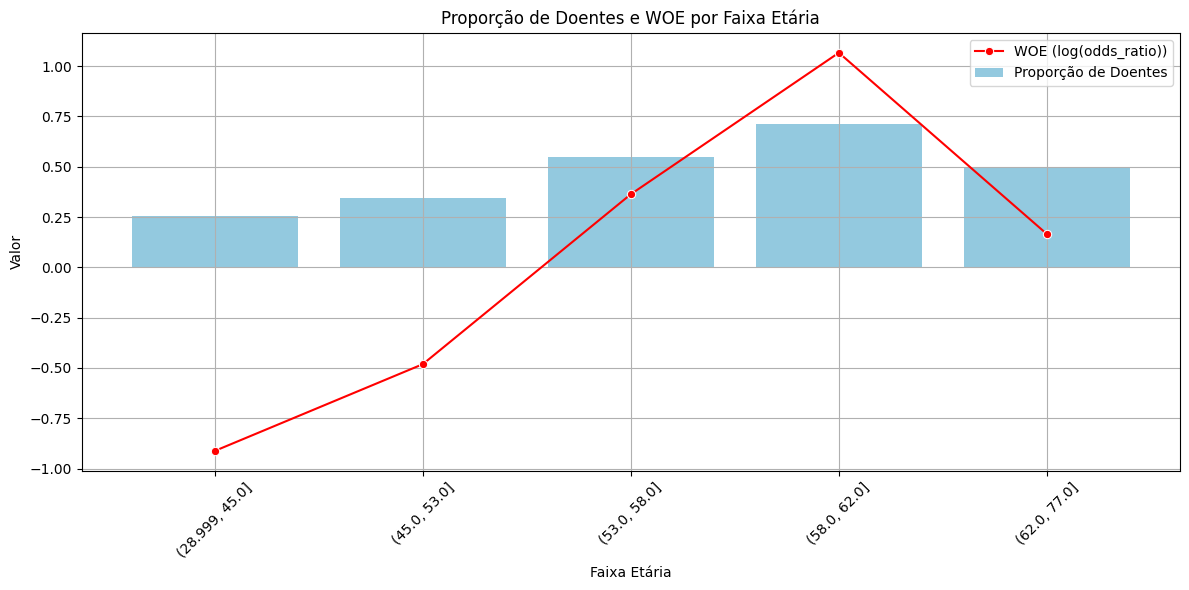

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras para proporção de doentes
sns.barplot(x=bivariada_age.index.astype(str), y=bivariada_age['media_doentes'], color='skyblue', label='Proporção de Doentes')

# Gráfico de linha para WOE
sns.lineplot(x=bivariada_age.index.astype(str), y=bivariada_age['woe'], color='red', marker='o', label='WOE (log(odds_ratio))')

# Estética
plt.xlabel('Faixa Etária')
plt.ylabel('Valor')
plt.title('Proporção de Doentes e WOE por Faixa Etária')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()